In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab

In [2]:
data= pd.read_csv('marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
numerical = data.select_dtypes([np.number])
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [4]:
categoricals = data.select_dtypes(include=['object'])
categoricals

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


C:\Users\thuyl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


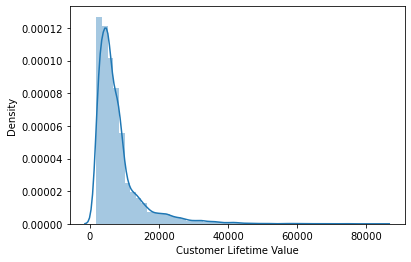

C:\Users\thuyl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


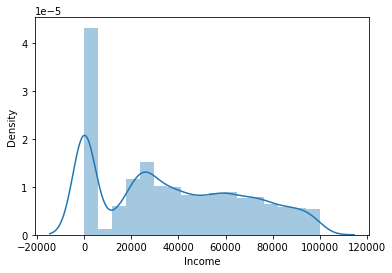

C:\Users\thuyl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


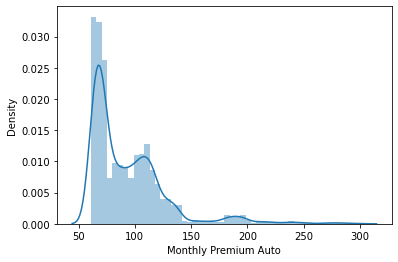

C:\Users\thuyl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


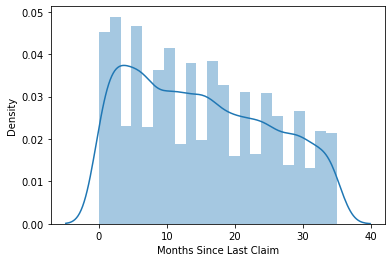

C:\Users\thuyl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


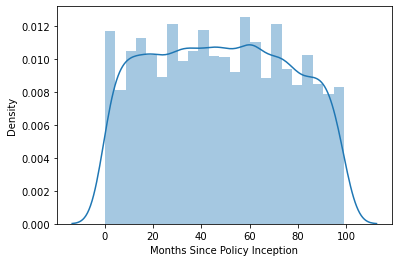

C:\Users\thuyl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


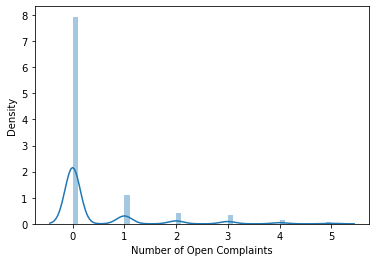

C:\Users\thuyl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


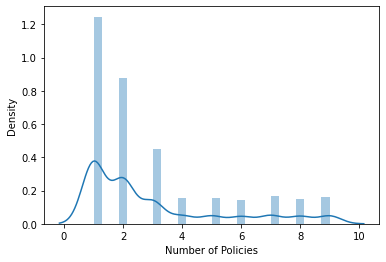

C:\Users\thuyl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


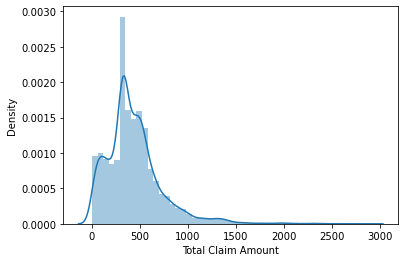

In [5]:
for col in numerical:
    sns.distplot(data[col])
    plt.show()

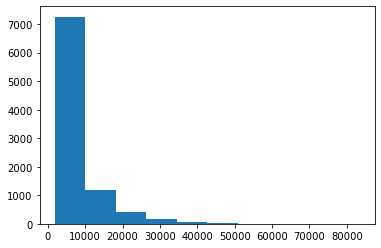

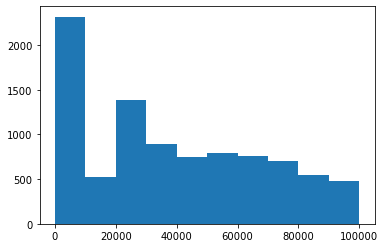

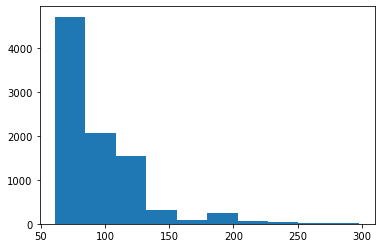

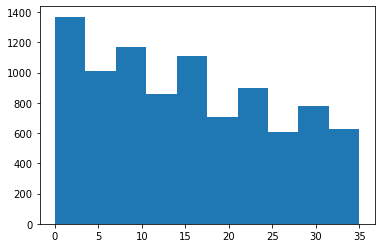

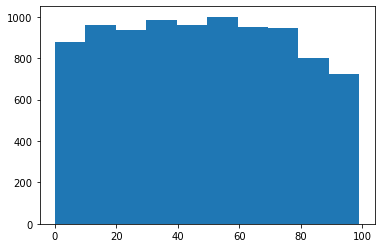

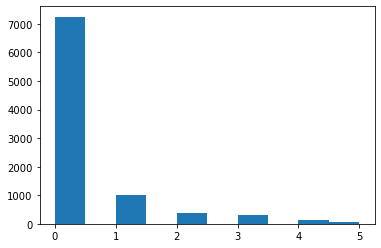

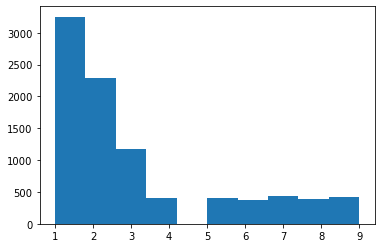

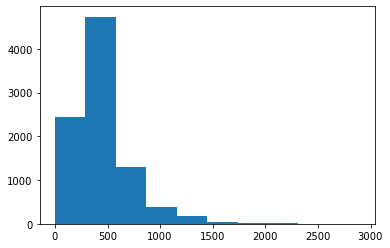

In [23]:
for col in numerical:
    plt.hist(data[col])
    plt.show()

            sqrt
0      52.569186
1      83.543617
2     113.522824
3      87.440619
4      53.044251
...          ...
9129  152.990156
9130   55.646305
9131   90.354250
9132   86.743544
9133   51.106133

[9134 rows x 1 columns]


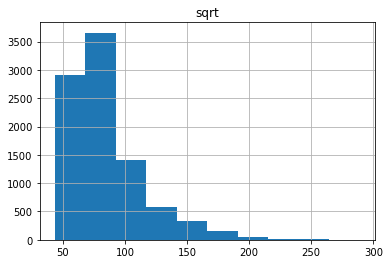

            sqrt
0     237.221416
1       0.000000
2     220.832516
3       0.000000
4     209.370485
...          ...
9129  268.218195
9130  146.982992
9131    0.000000
9132  148.124947
9133    0.000000

[9134 rows x 1 columns]


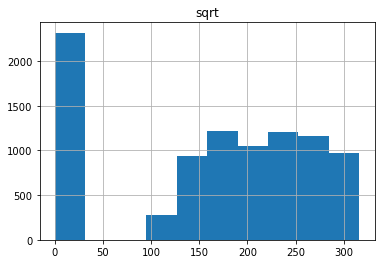

           sqrt
0      8.306624
1      9.695360
2     10.392305
3     10.295630
4      8.544004
...         ...
9129   8.544004
9130   8.888194
9131   9.219544
9132   9.797959
9133   8.774964

[9134 rows x 1 columns]


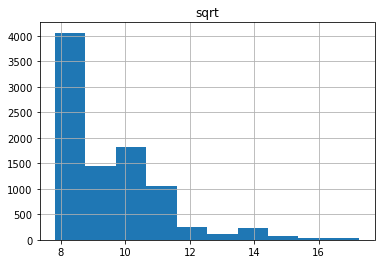

          sqrt
0     5.656854
1     3.605551
2     4.242641
3     4.242641
4     3.464102
...        ...
9129  4.242641
9130  3.741657
9131  3.000000
9132  5.830952
9133  1.732051

[9134 rows x 1 columns]


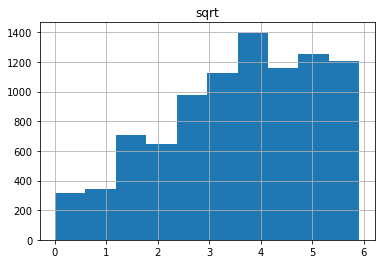

          sqrt
0     2.236068
1     6.480741
2     6.164414
3     8.062258
4     6.633250
...        ...
9129  9.433981
9130  5.291503
9131  6.082763
9132  1.732051
9133  9.486833

[9134 rows x 1 columns]


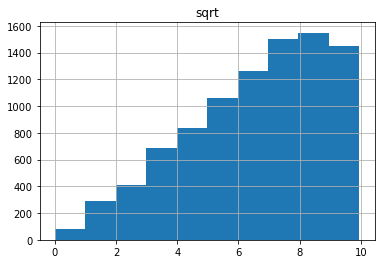

          sqrt
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
...        ...
9129  0.000000
9130  0.000000
9131  1.732051
9132  0.000000
9133  0.000000

[9134 rows x 1 columns]


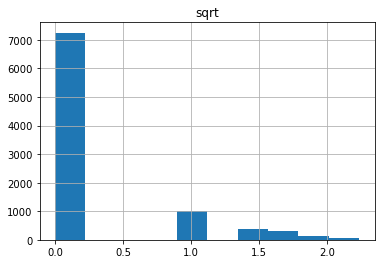

          sqrt
0     1.000000
1     2.828427
2     1.414214
3     2.645751
4     1.000000
...        ...
9129  1.414214
9130  1.000000
9131  1.414214
9132  1.732051
9133  1.000000

[9134 rows x 1 columns]


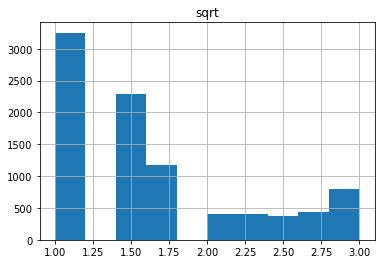

           sqrt
0     19.616604
1     33.637255
2     23.800677
3     23.019152
4     11.752909
...         ...
9129  14.079587
9130  19.473058
9131  28.120899
9132  26.290683
9133  19.224984

[9134 rows x 1 columns]


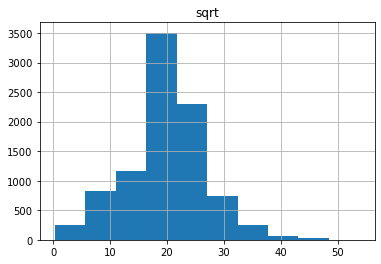

In [27]:
for col in numerical:
    data_tr= data[col].transform([np.sqrt])
    print(data_tr)
    data_tr.hist()
    plt.show()

In [31]:
x = numerical
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
  
print(vif_data)
#As we can see, Monthly Premium Auto and Total Claim Amount have very high values of VIF, indicating that these two variables are highly correlated. 
#Hence, considering these two features together leads to a model with high multicollinearity.

                         Feature        VIF
0        Customer Lifetime Value   2.806978
1                         Income   2.831329
2           Monthly Premium Auto  14.130566
3        Months Since Last Claim   2.784766
4  Months Since Policy Inception   3.267760
5      Number of Open Complaints   1.166620
6             Number of Policies   2.299313
7             Total Claim Amount   6.666879


In [37]:
vif_data.sort_values('VIF', ascending=False)

,Feature,VIF
2,Monthly Premium Auto,14.130566
7,Total Claim Amount,6.666879
4,Months Since Policy Inception,3.267760
1,Income,2.831329
0,Customer Lifetime Value,2.806978
3,Months Since Last Claim,2.784766
6,Number of Policies,2.299313
5,Number of Open Complaints,1.166620


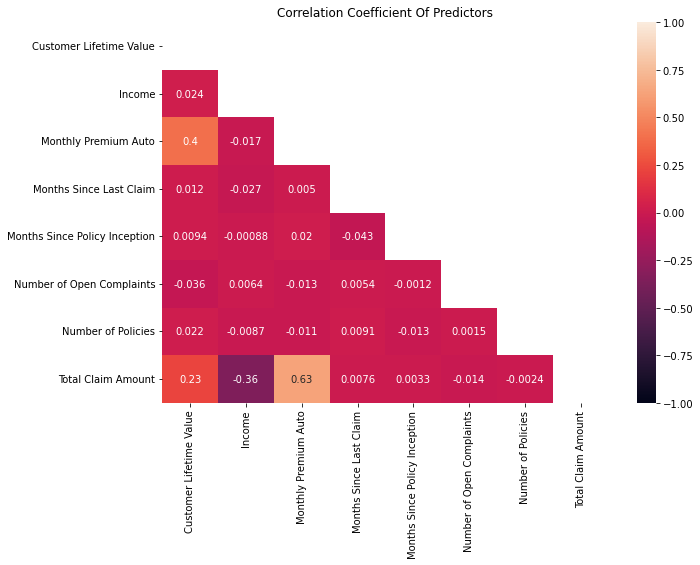

In [33]:
plt.figure(figsize=(10,7))


mask = np.triu(np.ones_like(numerical.corr(), dtype=bool))

# generate heatmap
sns.heatmap(numerical.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()
#there is no pair of features that have a high correlation

In [34]:
corr_data = data.select_dtypes([np.number])
correlation_matrix = corr_data.corr()  
correlation_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [38]:
numerical.corr()[['Total Claim Amount']].sort_values(by='Total Claim Amount', ascending=False)

,Total Claim Amount
Total Claim Amount,1.000000
Monthly Premium Auto,0.632017
Customer Lifetime Value,0.226451
Months Since Last Claim,0.007563
Months Since Policy Inception,0.003335
Number of Policies,-0.002354
Number of Open Complaints,-0.014241
Income,-0.355254


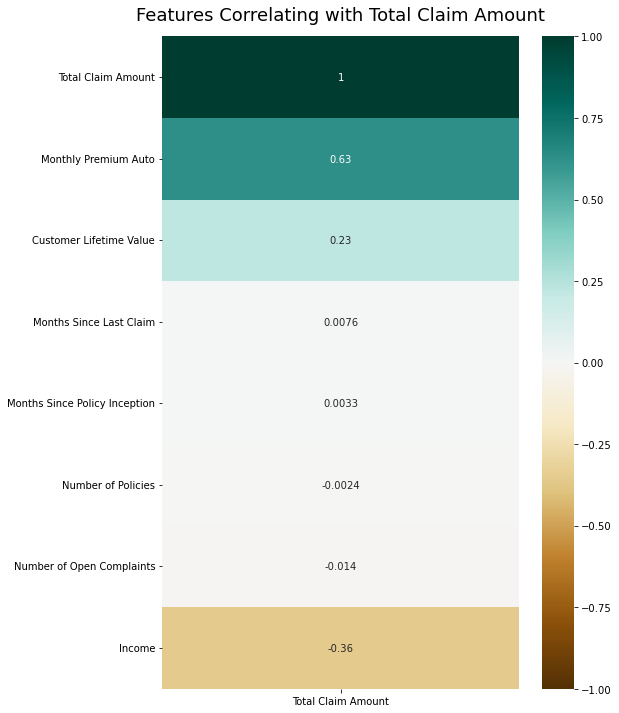

In [39]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(numerical.corr()[['Total Claim Amount']].sort_values(by='Total Claim Amount', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Total Claim Amount', fontdict={'fontsize':18}, pad=16);